## Social Media Information Extraction

### 1. Load the Dataset

In [1]:
import pandas as pd 
data = pd.read_csv('tweet_global_warming.csv', encoding = 'ISO-8859-1')

data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [2]:
# only 'tweet' column is of interest to us

df = pd.DataFrame(data['tweet'])

df.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


### 2. Text Cleaning
Using RegEx

In [3]:
import re

def clean_text(text):

    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    #Remove via
    text = re.sub(r'•à_', '', text)
    text = re.sub(r'via', '', text)
    text = re.sub(r'link', '', text)
    #Remove RT
    text = re.sub(r'rt', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[\[\]()?|!.;:,#@-]', '', text)
    return text

### 3. Generating Word Frequency

Frequency table of all the words present in all the tweets combined.

In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemm = WordNetLemmatizer()

def gen_freq(text, techn = 'none'):    

    # store the list of words
    l1 = []
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for w in text.split():
        l1.extend(w)  # length of the list increases iteratively
        
    for i in l1:
        if (techn == 'none'):
            s = i
            #word_list.extend(w)  # length of the list increases iteratively
        elif (techn == 'stem'):
            s = stemmer.stem(i)
        elif (techn == 'lemm'):
            s = lemm.lemmatize(i)
        word_list.append(s)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    print(word_freq[:15])
    
    return word_freq


In [5]:
text = df.tweet.apply(lambda x: clean_text(x))

# Series of word freq
word_freq = gen_freq(text.str)

climate    3557
change     3231
global     3069
warming    2823
the        2410
to         1863
of         1564
on         1146
a          1139
in         1126
and        1027
is          951
for         755
by          392
that        370
dtype: int64


In [6]:
word_freq = gen_freq(df.tweet.str)


the        1763
to         1720
Climate    1686
global     1606
climate    1554
of         1489
change     1446
Global     1348
warming    1335
on         1048
Change     1017
in          990
RT          977
and         958
[link]      956
dtype: int64


### 4. Word Cloud

In [7]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=150, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1200x800 with 1 Axes>

**NOTE :-**

1. Stop words -> "the", "in", "to", "of" etc. are with top frequency are just English Language constructs -> add **NO MEANING**.
2. Lot of **Noise** like **..** / : / **via**  -> Can be removed
3. Words like **Climate change** have occured multiple times in diffreent forms. -> As text is not **Normalized**.

### 5. Stop words Removal

In [8]:
# Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'into', 'own', 'com', "let's", 'ever', 'because', 'am', 'we', 'over', "isn't", 'few', 'at', 'be', "we're", 'me', 'themselves', 'here', 'who', "who's", 'get', 'herself', 'if', "it's", 'this', 'by', "they're", "where's", "doesn't", "hasn't", "how's", 'from', "you'd", 'these', 'other', 'such', 'during', 'its', 'with', 'yourself', 'however', 'under', "he'd", 'them', "you're", "wouldn't", 'too', 'again', 'a', 'while', 'nor', "shouldn't", 'she', 'could', "she'd", "they'll", 'those', "we'll", "she'll", "why's", "what's", 'how', 'did', "when's", "i've", 'where', 'same', 'him', 'in', 'any', 'else', 'up', 'or', 'each', "haven't", "there's", 'has', 'down', 'k', 'should', "they've", 'about', 'http', "you'll", "i'm", 'out', 'r', 'having', 'yourselves', 'they', "hadn't", 'does', 'myself', "didn't", 'since', 'theirs', 'above', 'to', 'it', "mustn't", "can't", 'on', 'most', 'that', "won't", 'can', 'would', 'ought', 'been', 'her', "wasn't", 'your', "we'd", 'more', 'below', 'cannot', 'do', 'then', 'have

In [9]:
text = df.tweet.apply(lambda x: clean_text(x))

In [10]:
# Series of word freq
word_freq = gen_freq(text.str)

print("Number of Words including STOPWORDS: ", len(word_freq))

climate    3557
change     3231
global     3069
warming    2823
the        2410
to         1863
of         1564
on         1146
a          1139
in         1126
and        1027
is          951
for         755
by          392
that        370
dtype: int64
Number of Words including STOPWORDS:  13963


In [11]:
# drop the words present in STOPWORDS
word_freq = word_freq.drop(labels = STOPWORDS, errors = 'ignore')
print("Number of Words excluding STOPWORDS: ", len(word_freq))
print(word_freq[:10])

Number of Words excluding STOPWORDS:  13796
climate    3557
change     3231
global     3069
warming    2823
new         323
&           264
us          255
news        248
bill        244
tcot        240
dtype: int64


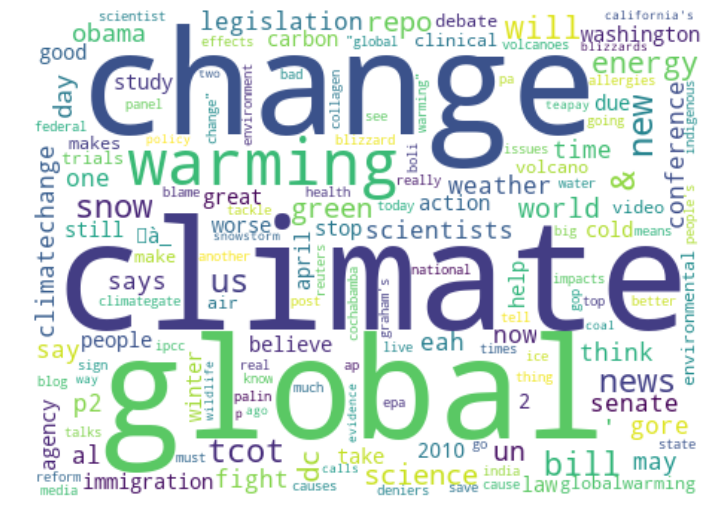

In [12]:
#Generate word cloud
wc1 = WordCloud(width=450, height=330, max_words=150, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

Insight into the areas of interest of the twitter users:

 - People are talking a lot about **global warming**. Which tells that many people are concerned about it.
 - President **Obama** is at the center of all talks here, along with the Intergovernmental Panel on Climate Change **(IPCC)**.
 - State of California is mentioned a lot : **California**, **dc**, **washington**.
 - Harmful emissions like **Diphosphorus(p2)**, **carbon** are mentioned a lot. 
 - There are also talks about weather phenomenon like: **snow**, **winter**, **blizzard**, **volcano**.
 - People are also talking about some sort of legislative action : **legislations**, **senate**, **bill**. 

### 6.a.  Tokenization : Stemming the Words

In [13]:

# Series of word freq
stm_freq = gen_freq(text.str, 'stem')

climat    3562
chang     3285
global    3072
warm      2840
the       2410
to        1863
of        1564
on        1146
a         1139
in        1126
and       1027
is         951
for        755
it         455
by         392
dtype: int64


**NOTE :-**
Few of the words have become meaningless due to **Stemming**, hence it **is not a good choice** for Normalization here. <br>
Let's try **Lemmatization** instead.

### 6.b.  Tokenization : Lemmatization of Words

In [14]:
lem_freq = gen_freq(text.str, 'lemm')

climate    3557
change     3242
global     3069
warming    2823
the        2410
to         1863
of         1564
a          1387
on         1146
in         1126
and        1027
is          951
for         755
it          455
by          392
dtype: int64


In [15]:
# drop the words present in STOPWORDS
stm_freq = stm_freq.drop(labels = STOPWORDS, errors = 'ignore')
lem_freq = lem_freq.drop(labels = STOPWORDS, errors = 'ignore')

print("  Number of Original Words excluding STOPWORDS: ", len(word_freq))
print("   Number of Stemmed Words excluding STOPWORDS: ", len(stm_freq))
print("Number of Lemmatized Words excluding STOPWORDS: ", len(lem_freq))

  Number of Original Words excluding STOPWORDS:  13796
   Number of Stemmed Words excluding STOPWORDS:  12131
Number of Lemmatized Words excluding STOPWORDS:  13136


#### Generate word cloud for Lemmatized Text


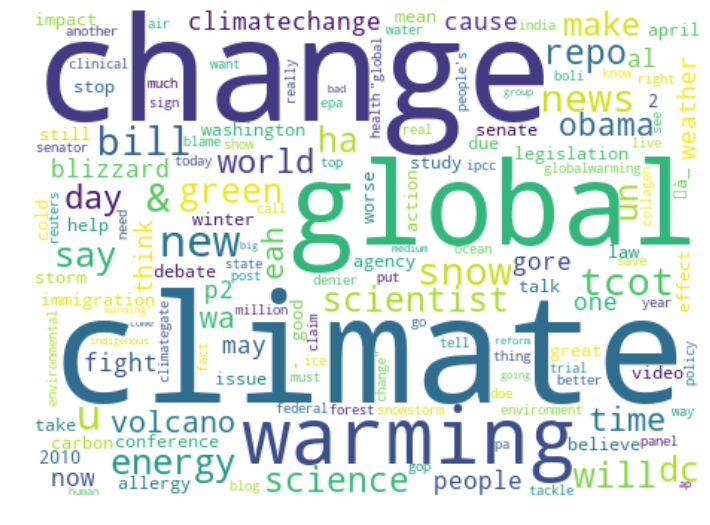

In [16]:
wc2 = WordCloud(width=450, height=330, max_words=150, background_color='white').generate_from_frequencies(lem_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6.c. Annotating all Tokens in the Text : using Part of Speech Tag (POS)

In [17]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\rl\anaconda3\lib\site-packages (19.3.1)


In [18]:
!pip3 install nltk

In [19]:
import nltk

In [20]:
#nltk.download()

In [21]:
from nltk import pos_tag

pTag = pos_tag(lem_freq.index)
# split the token and post_tag

tok, pt = map(list, zip(*pTag)) 
pt[:5]

['NN', 'NN', 'JJ', 'VBG', 'JJ']

In [22]:
df_Lemma = pd.DataFrame()

df_Lemma['Lemmatized Words'] = lem_freq.index
df_Lemma['Count'] = lem_freq.values
df_Lemma["Pos_Tags"] = pt

df_Lemma.head()


,Lemmatized Words,Count,Pos_Tags
0,climate,3557,NN
1,change,3242,NN
2,global,3069,JJ
3,warming,2823,VBG
4,new,323,JJ


### 7. Maximum Utilized Parts of Speech

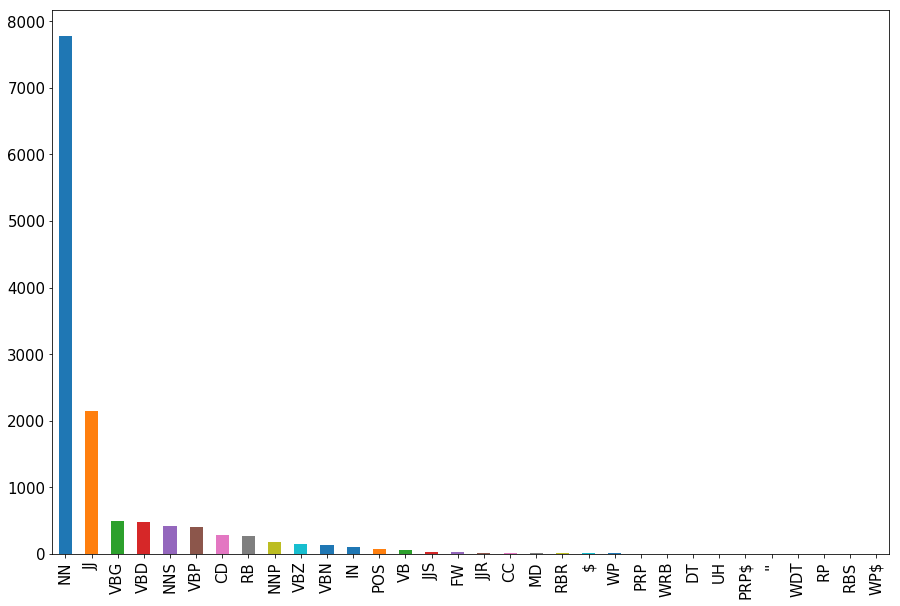

In [23]:
plot_pos_Tags = pd.value_counts(df_Lemma["Pos_Tags"].values, sort=True).plot(kind='bar',figsize=(15,10), fontsize=15)

**NOTE :-**
Nouns(NN) and Adjectives(JJ) are the maximum used parts of speech here.